# STAT207 Mini-Project #1 - Case Study: Cats Breeds Analysis
Name: Vivian Lin

Netid: vivianl5

In [1]:
# Imports here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import Image

## 1. Introduction

Cats are one of the most popular pets around the world. Choosing one fluffy friend to accompany us is an important decision, as each breed has its own unique traits and characteristics. By analyzing this dataset, we can better understand the diverse world of our fluffy companions and find the perfect match for every cat lover.

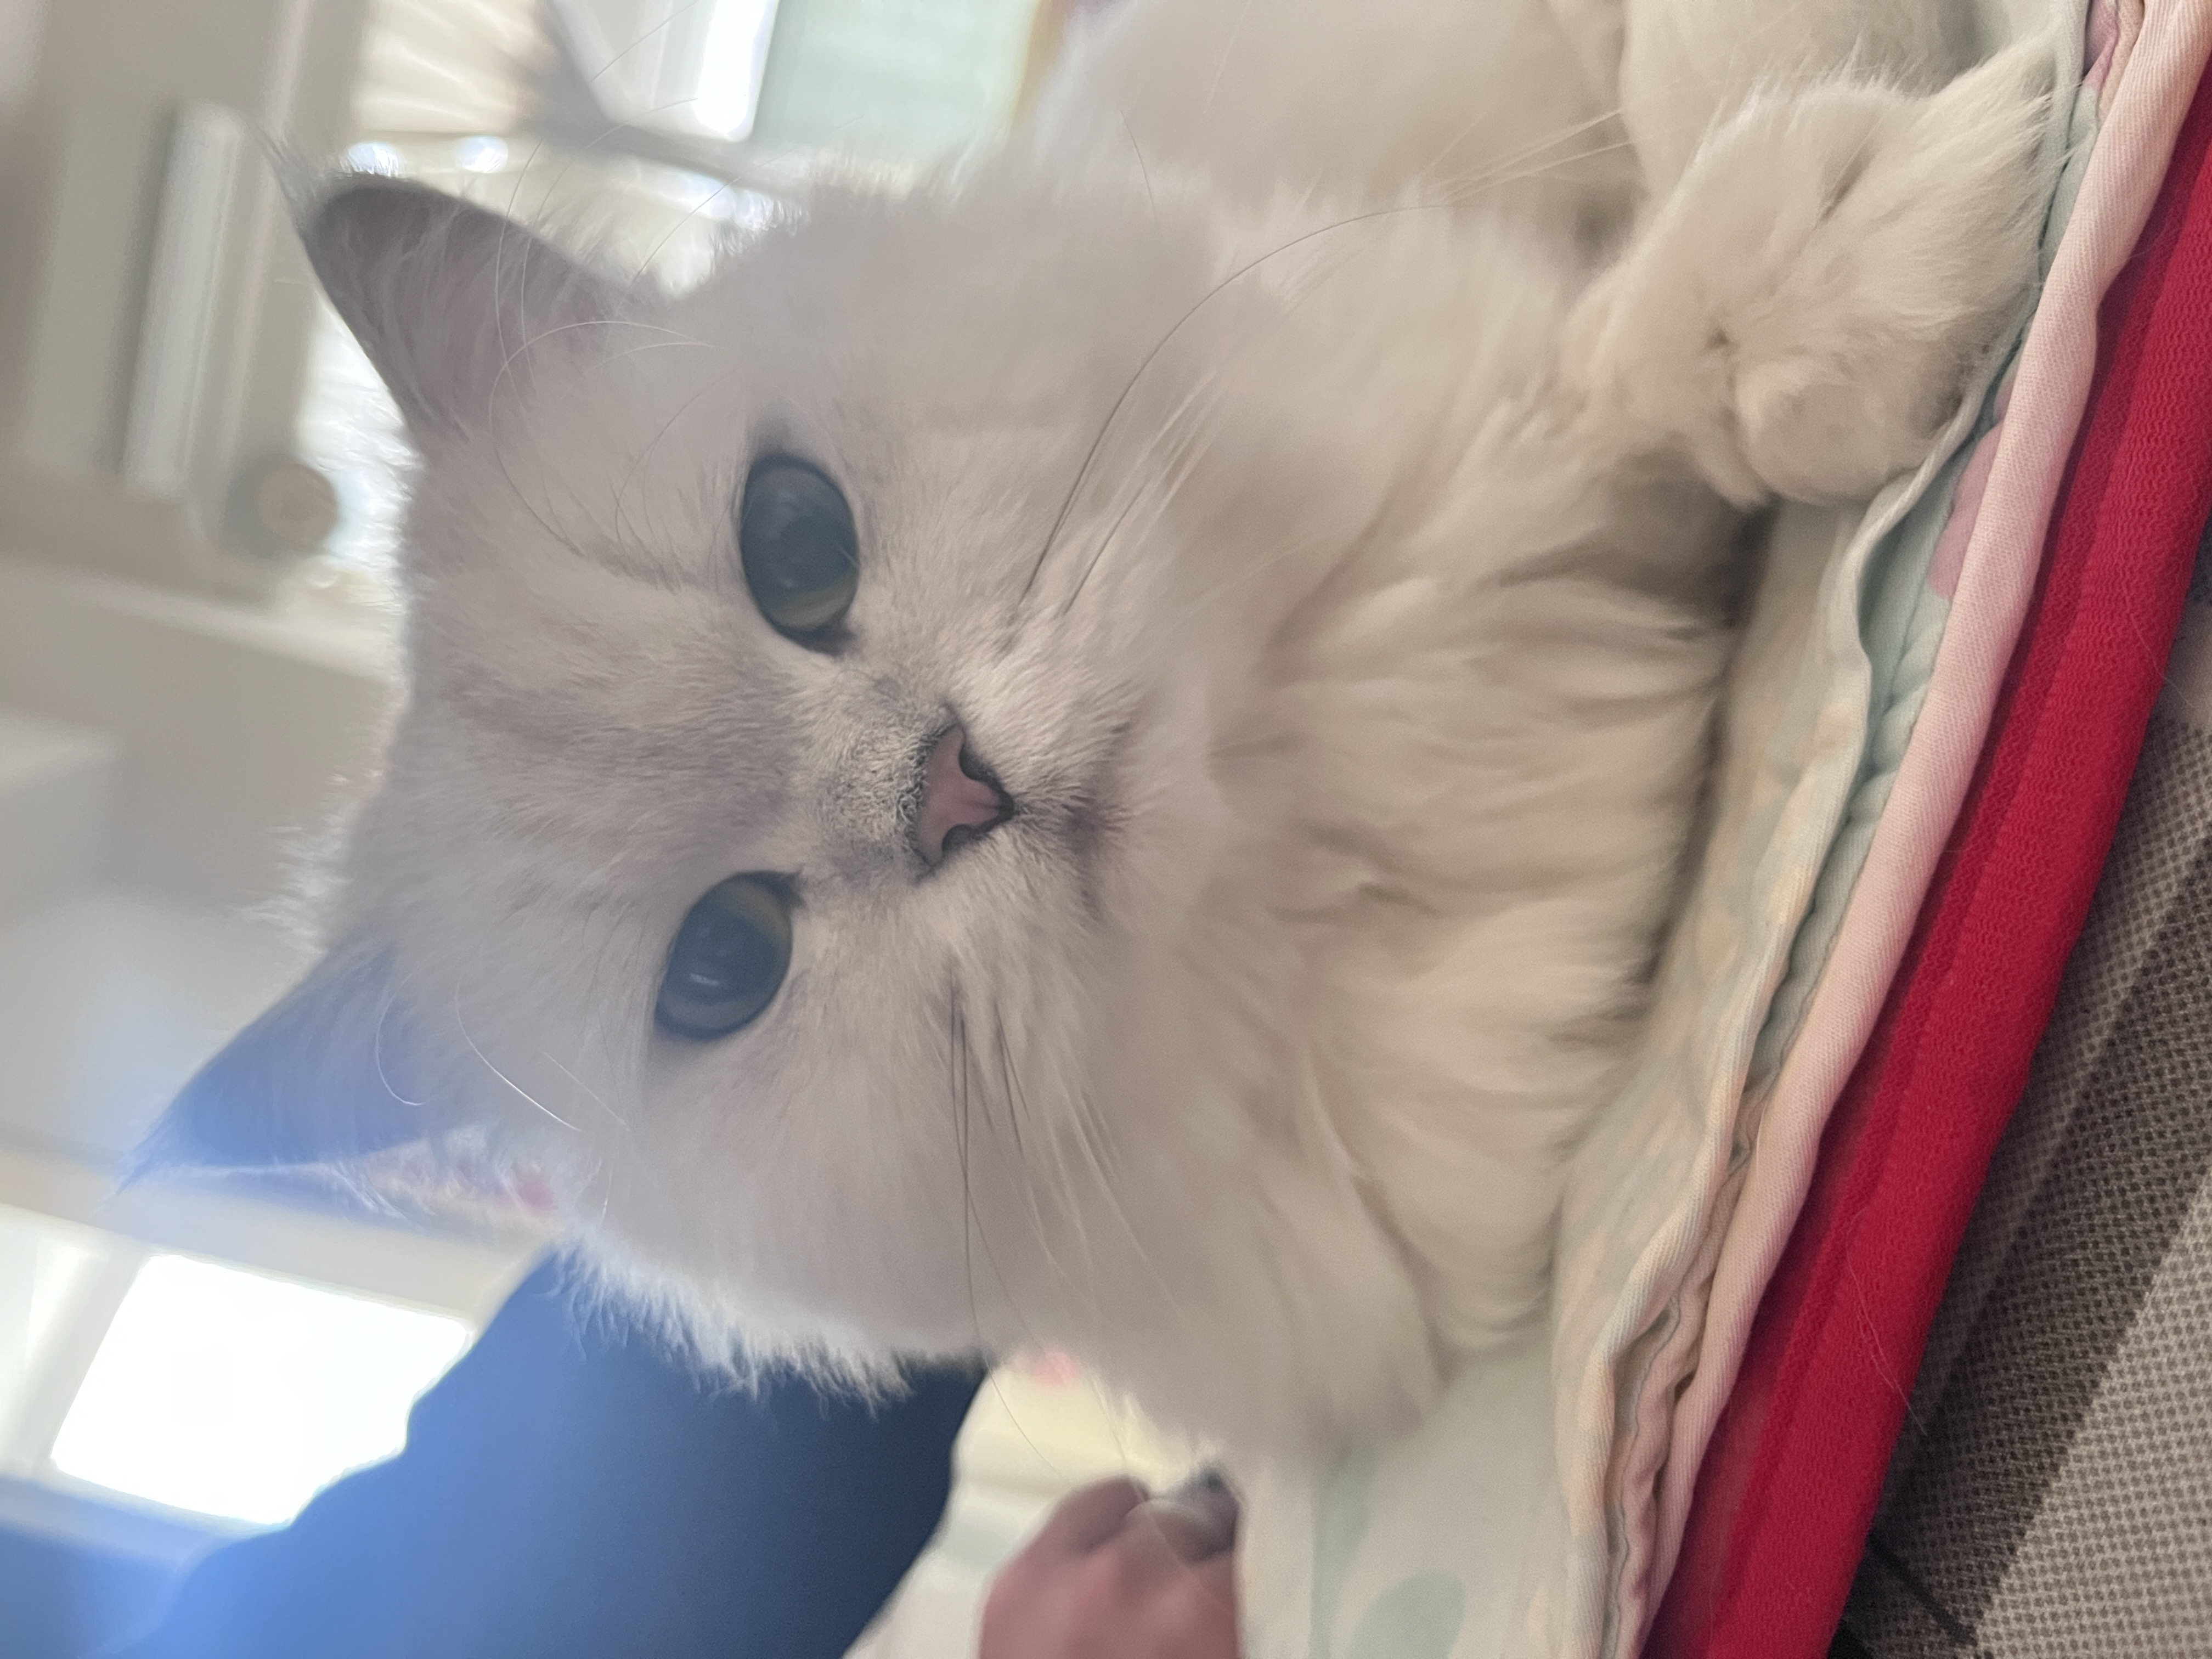

In [2]:
# Just for fun! I put one of the pictures of my cat!
Image(filename="IMG_1259.jpg")

## 2. Dataset Discussion

This dataset, from Kaggle(https://www.kaggle.com/datasets/warcoder/cat-breeds-details), explores 62 distinct cat breeds, providing insights into their origins, sizes, and lifespans. It also includes key attributes such as playfulness, intelligence, and shedding levels, represented numerically, with a higher value representing more goodness. It has the following columns:

1. name: Breed name
2. length: Length of cat
3. origin: Breed origin
4. min_life_expectancy: Minimun life expectancy of cat
5. max_life_expectancy: Maximun life expectancy of cat
6. min_weight: Minimun weight of cat
7. max_weight: Maximun weight of cat
8. family_friendly: Family friendly level of cat
9. shedding: Shedding level of cat
10. general_health: General health level of cat
11. playfulness: Playfulness level of cat
12. children_friendly: Children friendly level of cat
13. grooming: Grooming level of cat
14. intelligence: Intelligence level of cat
15. other_pets_friendly: Other pets friendly level of cat

## 3. Dataset Cleaning

1. Read the csv file into a dataframe, converting all implicit missing values in the columns that we intend to use to NaN.
2. Display the first 5 rows.
3. Show the number of rows and columns in the dataframe.

In [3]:
# Load the dataframe and deal with the missing values.
df = pd.read_csv("cat_breeds.csv")
df.head(5)

,name,length,origin,min_life_expectancy,max_life_expectancy,min_weight,max_weight,family_friendly,shedding,general_health,playfulness,children_friendly,grooming,intelligence,other_pets_friendly
0,Abyssinian,12 to 16 inches,Southeast Asia,9.0,15.0,6.0,10.0,3,3,2,5,5,3,5,5
1,Aegean,Medium,Greece,9.0,10.0,7.0,10.0,5,3,4,4,5,4,4,3
2,American Bobtail,Medium,United States and Canada,11.0,15.0,8.0,13.0,4,4,4,4,4,3,4,4
3,American Shorthair,12 to 15 inches,United States,15.0,20.0,7.0,12.0,3,3,4,2,4,4,4,3
4,American Wirehair,Medium to large,United States,14.0,18.0,8.0,15.0,4,3,5,3,4,5,4,3


In [4]:
# To see what kinds of information contain in the dataframe.
df.isna().sum()

# Another way to do so.
#df.isnull().sum()

name                   0
length                 0
origin                 0
min_life_expectancy    0
max_life_expectancy    0
min_weight             0
max_weight             0
family_friendly        0
shedding               0
general_health         0
playfulness            0
children_friendly      0
grooming               0
intelligence           0
other_pets_friendly    0
dtype: int64

In [5]:
# Show the numbers of rows and columns in the dataframe.
df.shape

(62, 15)

In [6]:
# Drop NaN values.
#df.dropna()

Since there is no "NaN" value in this dataset, I do not need to perform any dropping method to this dataset.

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

# Research Question 1

Research Question 1: Does playfulness influence the relationship between maximum body weight and maximum life expectancy of a cat?

Motivation: As a cat owner, I want my cat to live long, happy lives, and I know that both weight and activity levels play a crucial role in cat's well-being. It's clear that obesity can shorten a cat’s lifespan; however, a playful nature might help decreasing some of the risks by keeping them active. Hence, I would like to know whether playfulness influences the relationship between body weight and life expectancy or not.

x: "max_weight" is the numerical varibale.

y: "max_life_expectancy" is the numerical varibale.

z: "playfulness" is the categorical(ordinal) variable.

Text(0.5, 1.0, 'Impact of Playfulness on the Relationship Between Maximum Weight and Maximum Life Expectancy')

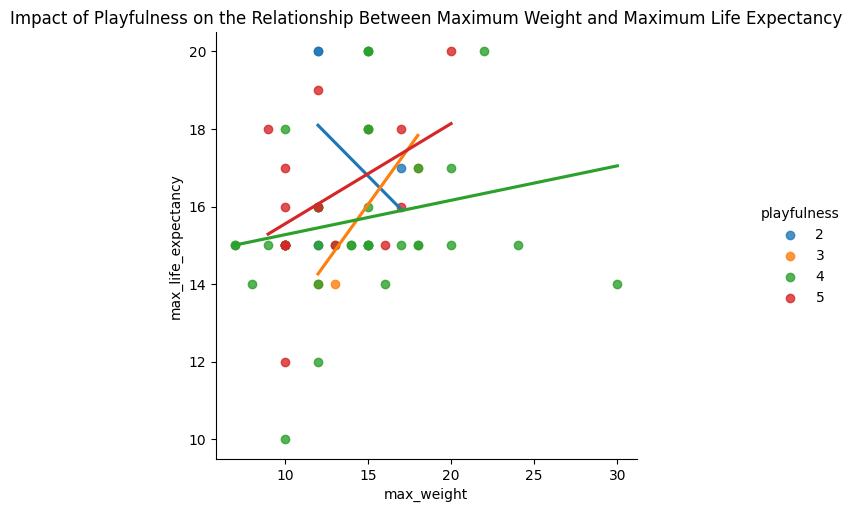

In [7]:
sns.lmplot(x="max_weight", y="max_life_expectancy", hue="playfulness", data=df, ci=False)
plt.title("Impact of Playfulness on the Relationship Between Maximum Weight and Maximum Life Expectancy")

Below are the data insights I found:
1. Playfulness level 2 (Blue Line) has a negative slope. Less playful cats at lower weights tend to live longer, but as their weight increase, their life expectancy decline. This might due to factors such as increased health risks at higher weights, etc.
2. Playfulness level 3 (Orange Line) has the most positive slope which could indicate that moderately playful cats benefit from higher weight.
3. Playfulness level 4 (Green Line) has a slightly positive slope. This suggests that weight does not significantly impact lifespan for these cats and there might be more influential factors result in this.
4. Playfulness level 5 (Red Line) has a positive slope. A possible explanation of this is that playful cats might have higher energy expenditure which lead to healthier body compositions at higher weights. In addition, their playfulness could also contribute to live longer.

Overall, I think playfulness seems to influence the relationship between maximum body weight and maximum life expectancy in cats. Moderately playful cats show a positive correlation between maximum weight and maximum life expectancy, while less playful cats tend to have a negative relationship. 

In [8]:
df[["max_life_expectancy", "max_weight", "playfulness"]].corr()

,max_life_expectancy,max_weight,playfulness
max_life_expectancy,1.000000,0.203353,-0.098982
max_weight,0.203353,1.000000,-0.088572
playfulness,-0.098982,-0.088572,1.000000


1. Correlation between "max_life_expectancy" and "max_weight" is 0.2034. This means there is a weak positive correlation and aligns with the regression plot in which some slopes showed a slightly positive trend.
2. Correlation between "max_life_expectancy" and "playfulness" is -0.0990. This means there is a weak negative correlation and implies that playfulness might not be a strong determinant of lifespan.
3. Correlation between "max_weight" and "playfulness" is -0.0886. This means there is a weak negative correlation and shows a slightly tendency for heavier cat to be less playful(but the correlation is too weak to make a meaningful relationship).

# Research Question 2

Research Question 2: How does family-friendliness influence the relationship between intelligence and maximum weight?

Motivation: As a cat owner who may want to have more cats in the future,  I want to understand how family-friendliness influences the relationship between intelligence and maximum weight to ensure that my future cats are both compatible with my family and ...?

x: "intelligence" is the categorical(ordinal) variable.

y: "max_weight" is the numerical varibale.

z: "family_friendly" is the categorical(ordinal) variable.

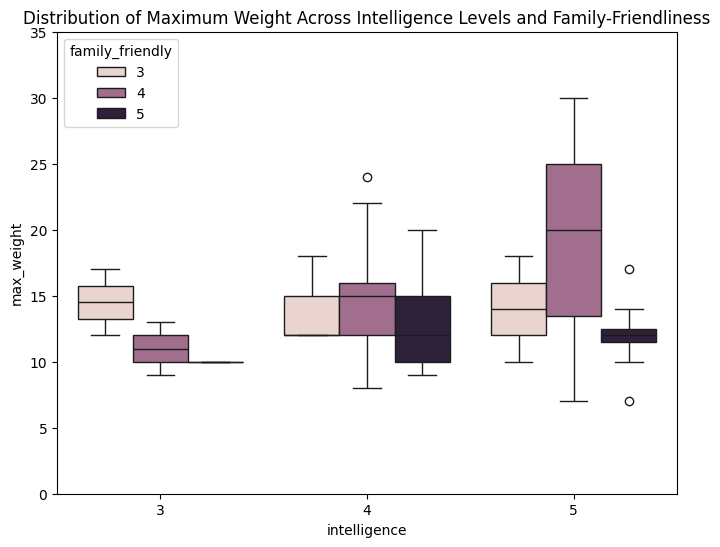

In [9]:
# Create the side-by-side box plot.
plt.figure(figsize=(8,6))
sns.boxplot(x="intelligence", y="max_weight", hue="family_friendly", data=df)
plt.ylim([0, 35])
plt.title("Distribution of Maximum Weight Across Intelligence Levels and Family-Friendliness")
plt.show()


In [10]:
df[(df["intelligence"] == 3) & (df["family_friendly"] == 5)]

,name,length,origin,min_life_expectancy,max_life_expectancy,min_weight,max_weight,family_friendly,shedding,general_health,playfulness,children_friendly,grooming,intelligence,other_pets_friendly
41,Peterbald,Medium,Russia,12.0,15.0,6.0,10.0,5,1,3,4,4,2,3,4


Below are the data insights I found:
1. For intelligence level 3, family friendly at level 3 has a higher median maximum weight than family friendly at level 4. However, family friendly at level 4 has a relatively smaller distribution.
2. For intelligence level 4, all three groups of family friendly show overlapping distributions. In addition, family friendly at level 5 has a slightly wider spread.
3. For intelligence level 5, family friendly at level 4 has the largest distribution, while family friendly at level 5 has the smallest distribution.

Overall, I think the distribution of maximum weight varies across intelligence levels and family-friendliness. At lower intelligence levels(level 3), the distributions are more apparent. When intelligence level become higher, the distributions overlap more which suggest that family-friendliness has a less distinct impact on maximum weight. In addition, at intelligence level 5, family-friendly level 4 has the widest spread, while family-friendly level 5 has a narrowest spread. This might suggest that higher intelligence may create bigger variation in weight depending on family-friendliness. 

Note that for intelligence level 3 and family friendly level 5, we only have one data point for that, so the box plot is flatten into a line.

## 5. Conclusion

Summarization: 

In summary, playfulness clearly affects how maximum weight and maximum life expectancy are connected in cats, with moderate playfulness being the most positive. Meanwhile, family-friendliness has a stronger effect on maximum weight when intelligence is lower, but this effect becomes weaker as intelligence increases.


Short coming:

In general, the dataset is not large enough for further analysis on breed. Currently, the we only have one row for each breed (except for American Shorthair, which has two rows for this breed). 

Future work:

The future work may be to increase the data instance in this dataset. In this way, we are able to analysis for each breed instead of analyzing all the breeds together. 